# Импорт бибилиотек + первый взгляд

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [13]:
df = pd.read_csv('C:/Users/forki/PycharmProjects/US Superstore Dataset/US-Superstore-data.csv')

In [15]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [27]:
df.shape

(9994, 21)

# Обработка колонок

In [41]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [47]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [53]:
pd.set_option('display.max_columns')

# RFM-сегментация 

In [155]:
snapshot_date = df['Order Date'].max() + dt.timedelta(days=1)

In [73]:
rfm_data = df.groupby('Customer ID').agg(
    {
        'Order Date': lambda x: (snapshot_date - x.max()).days,
        'Order ID': 'nunique',
        'Sales': 'sum'
    }
)

In [75]:
rfm_data.rename(columns={
    'Order Date': 'Recency',
    'Order ID': 'Frequency',
    'Sales': 'Monetary'
}, inplace=True)

In [77]:
rfm_data

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,185,5,5563.560
AA-10375,20,9,1056.390
AA-10480,260,4,1790.512
AA-10645,56,6,5086.935
AB-10015,416,3,886.156
...,...,...,...
XP-21865,44,11,2374.658
YC-21895,5,5,5454.350
YS-21880,10,8,6720.444


In [95]:
r_label = range(-5, 0, -1)
f_label = range(1, 6)
m_label = range(1, 6)

rfm_data['R_score'] = pd.qcut(rfm_data['Recency'], q=5, labels = r_labels, duplicates='drop').astype(int)
rfm_data['F_score'] = pd.qcut(rfm_data['Frequency'], q=5, labels = f_labels, duplicates='drop').astype(int)
rfm_data['M_score'] = pd.qcut(rfm_data['Monetary'], q=5, labels = m_labels, duplicates='drop').astype(int)

rfm_data['RFM_score'] = rfm_data['R_score'].astype(str) + rfm_data['F_score'].astype(str) + rfm_data['M_score'].astype(str)



In [101]:
rfm_data = rfm_data.drop('RFM_score', axis=1)

In [103]:
rfm_data

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
Customer ID,,,,,,,
AA-10315,185,5,5563.560,2,2,5,225
AA-10375,20,9,1056.390,5,5,2,552
AA-10480,260,4,1790.512,1,1,3,113
AA-10645,56,6,5086.935,3,3,5,335
AB-10015,416,3,886.156,1,1,1,111
...,...,...,...,...,...,...,...
XP-21865,44,11,2374.658,4,5,3,453
YC-21895,5,5,5454.350,5,2,5,525
YS-21880,10,8,6720.444,5,4,5,545


In [105]:
def assign_segment(row):
    if row['R_score'] >= 4 and row['F_score'] >= 4 and row['M_score'] >= 4:
        return 'Чемпионы'
    elif row['R_score'] >= 4 and row['F_score'] >= 4:
        return 'Лояльные клиенты'
    elif row['R_score'] >= 3 and row['F_score'] >= 3:
        return 'Потенциально лояльные'
    elif row['R_score'] <= 2 and row['F_score'] >= 4:
        return 'В зоне риска (уходят)'
    elif row['R_score'] <= 2 and row['F_score'] <= 2:
        return 'Спящие'
    elif row['R_score'] == 5:
        return 'Новички'
    else:
        return 'Требуют внимания'

rfm_data['Segment'] = rfm_data.apply(assign_segment, axis=1)

In [107]:
rfm_data

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
Customer ID,,,,,,,,
AA-10315,185,5,5563.560,2,2,5,225,Спящие
AA-10375,20,9,1056.390,5,5,2,552,Лояльные клиенты
AA-10480,260,4,1790.512,1,1,3,113,Спящие
AA-10645,56,6,5086.935,3,3,5,335,Потенциально лояльные
AB-10015,416,3,886.156,1,1,1,111,Спящие
...,...,...,...,...,...,...,...,...
XP-21865,44,11,2374.658,4,5,3,453,Лояльные клиенты
YC-21895,5,5,5454.350,5,2,5,525,Новички
YS-21880,10,8,6720.444,5,4,5,545,Чемпионы


In [123]:
rfm_data['Segment'].value_counts()

Segment
Потенциально лояльные    199
Спящие                   181
Требуют внимания         176
Чемпионы                  85
В зоне риска (уходят)     59
Новички                   48
Лояльные клиенты          45
Name: count, dtype: int64

In [113]:
segment_counts = rfm_data['Segment'].value_counts()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Потенциально лояльные'),
  Text(1, 0, 'Спящие'),
  Text(2, 0, 'Требуют внимания'),
  Text(3, 0, 'Чемпионы'),
  Text(4, 0, 'В зоне риска (уходят)'),
  Text(5, 0, 'Новички'),
  Text(6, 0, 'Лояльные клиенты')])

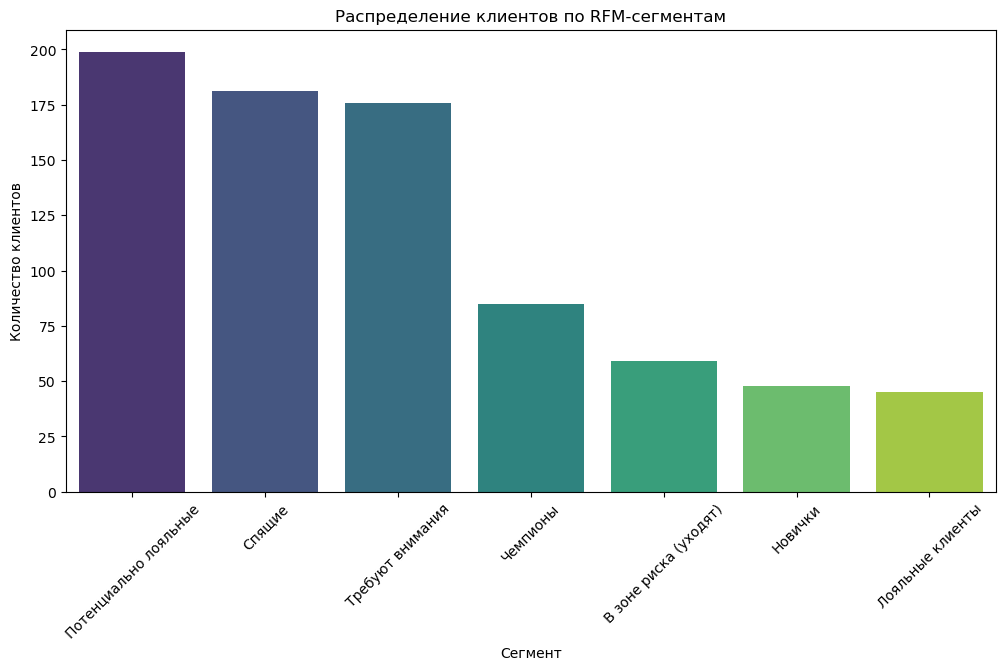

In [117]:
plt.figure(figsize=(12, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis', hue=segment_counts.index)
plt.title('Распределение клиентов по RFM-сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)

In [121]:
segment_counts.values

array([199, 181, 176,  85,  59,  48,  45], dtype=int64)

# Когортный анализ

In [127]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)


df['OrderMonth'] = df['Order Date'].apply(get_month)

df['CohortMonth'] = df.groupby('Customer ID')['OrderMonth'].transform('min')

In [131]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year * 12 + month

order_month_int = get_date_int(df, 'OrderMonth')
cohort_month_int = get_date_int(df, 'CohortMonth')

df['CohortIndex'] = order_month_int - cohort_month_int + 1

cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['Customer ID'].nunique().reset_index()


cohort_counts = cohort_data.pivot_table(index='CohortMonth',
                                        columns='CohortIndex',
                                        values='Customer ID')

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year * 12 + month


order_month_int = get_date_int(df, 'OrderMonth')
cohort_month_int = get_date_int(df, 'CohortMonth')

df['CohortIndex'] = order_month_int - cohort_month_int + 1

cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['Customer ID'].nunique().reset_index()


cohort_counts = cohort_data.pivot_table(index='CohortMonth',
                                        columns='CohortIndex',
                                        values='Customer ID')

Text(591.4444444444445, 0.5, 'Когорта (месяц первой покупки)')

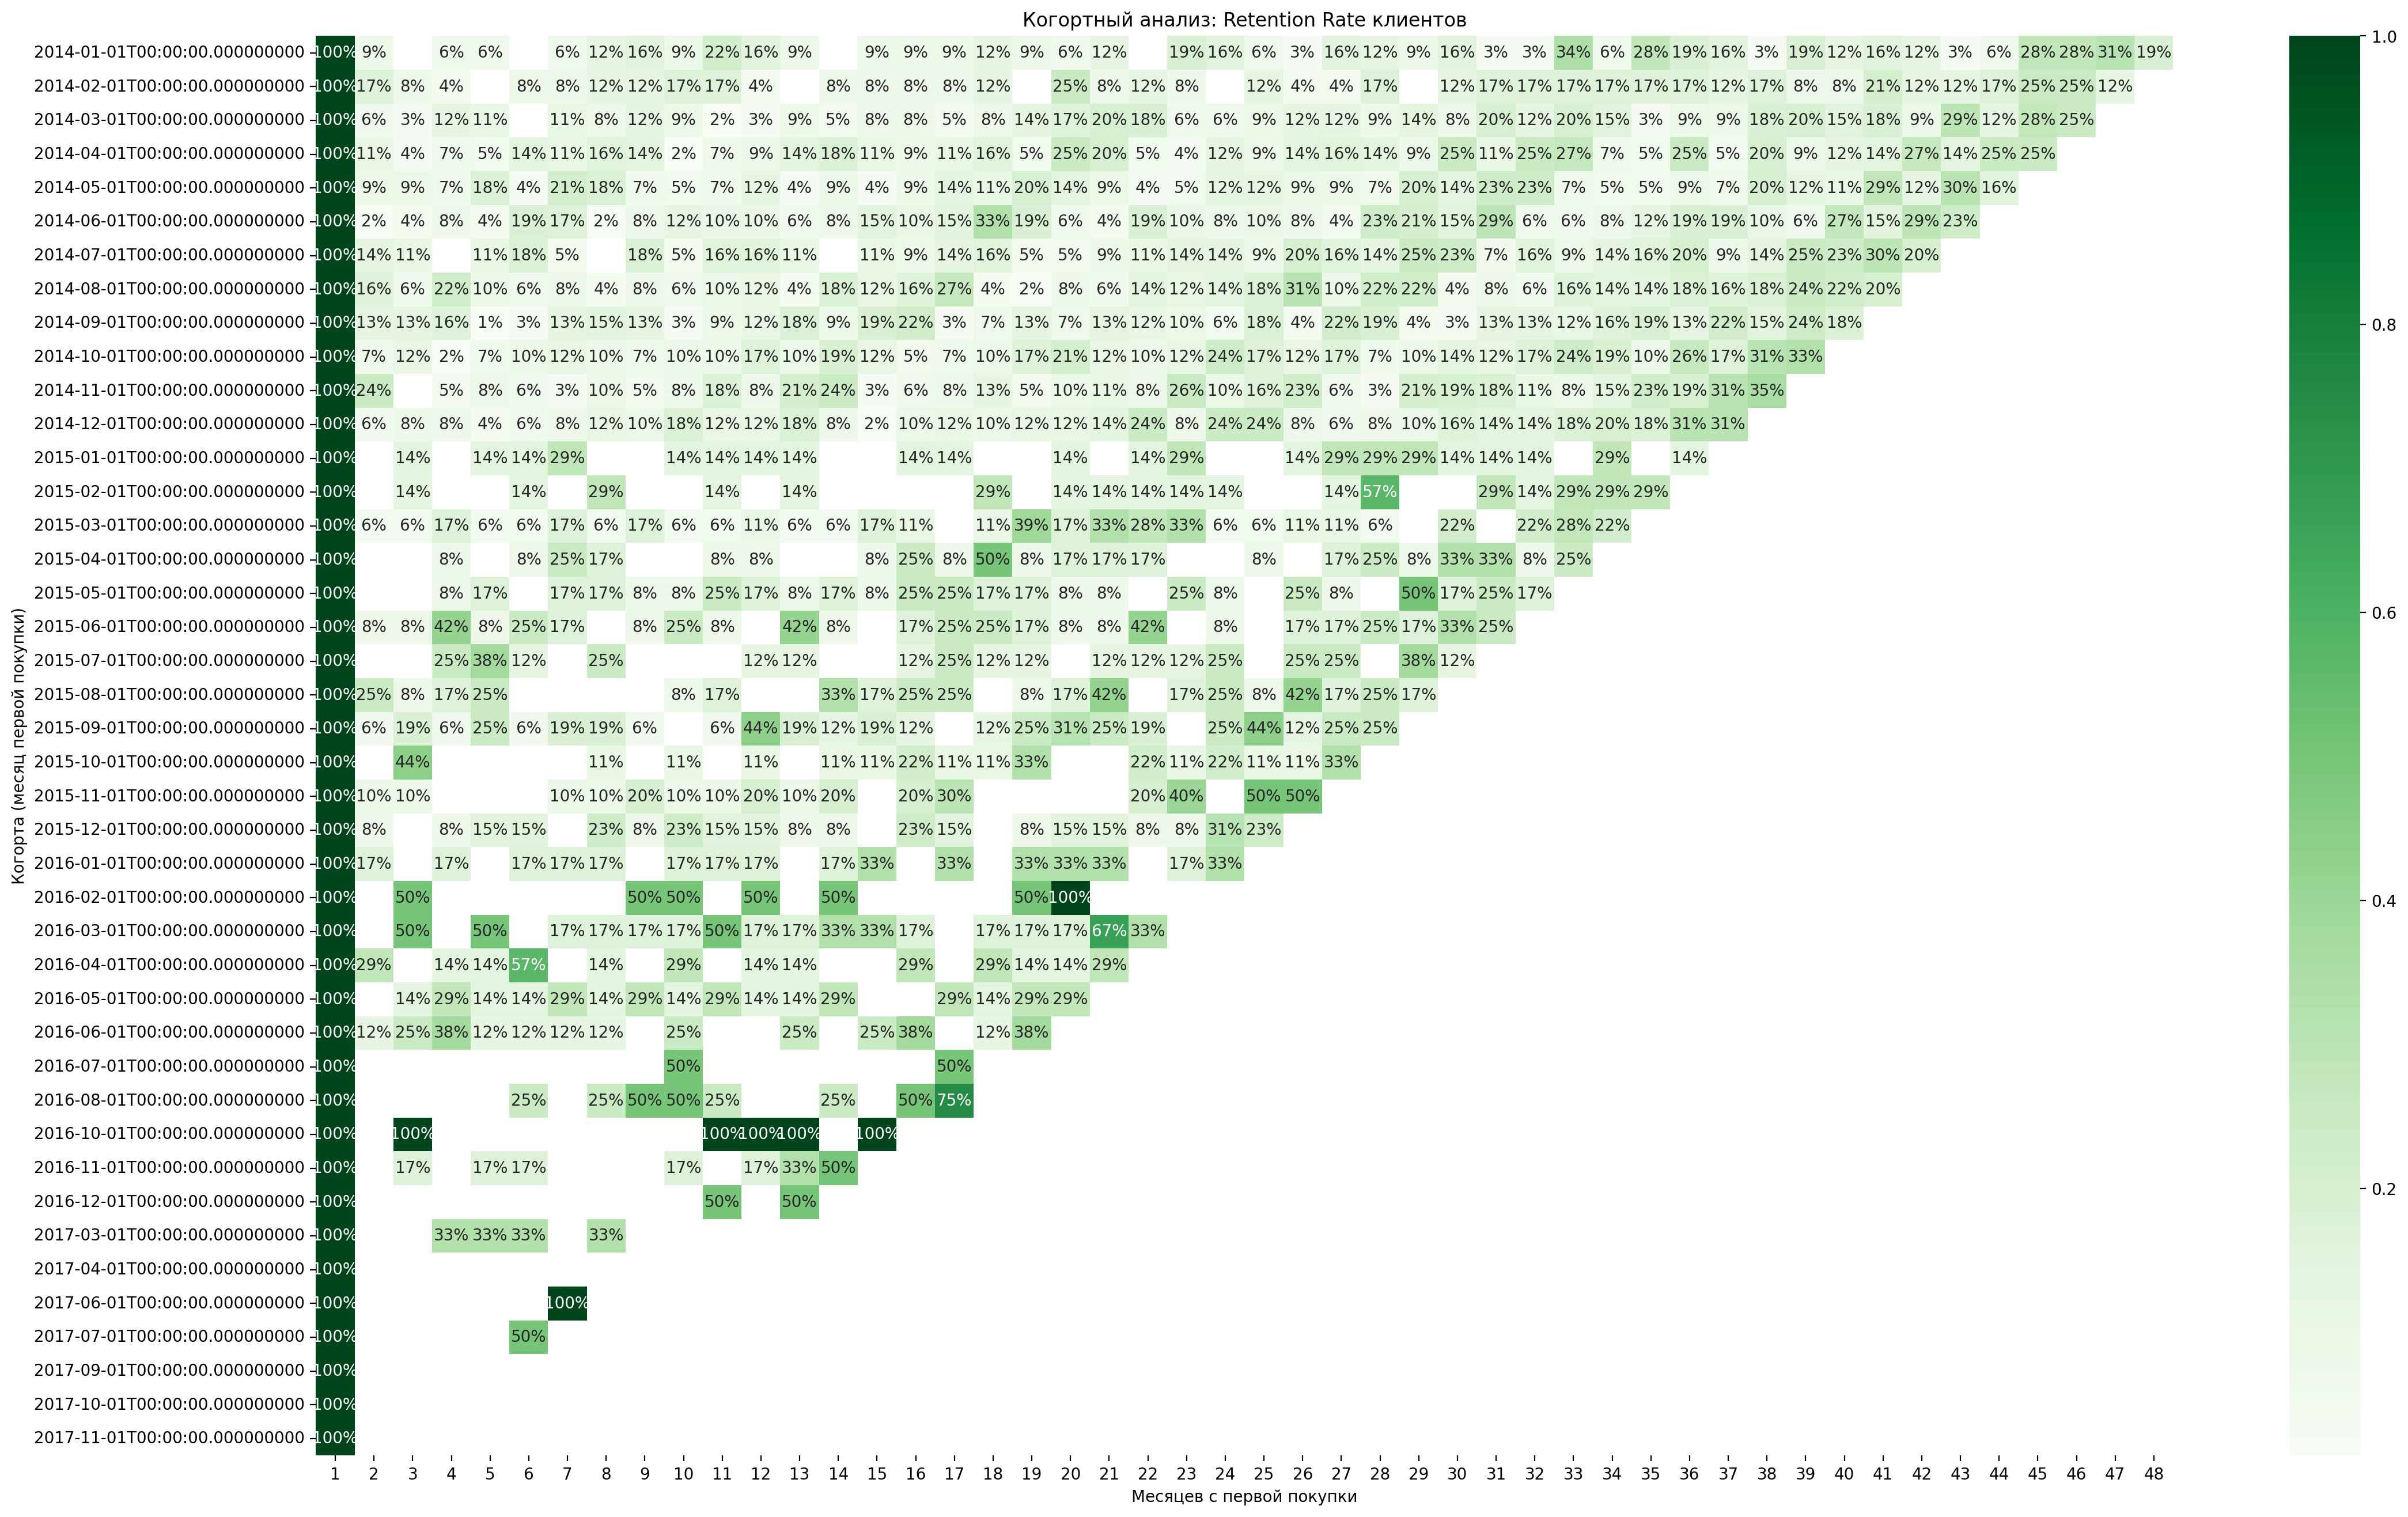

In [143]:
cohort_size = cohort_counts.iloc[:, 0]

retention_matrix = cohort_counts.divide(cohort_size, axis=0)

plt.figure(figsize=(26, 16), dpi=200)
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Greens')
plt.title('Когортный анализ: Retention Rate клиентов')
plt.xlabel('Месяцев с первой покупки')
plt.ylabel('Когорта (месяц первой покупки)')